<a href="https://colab.research.google.com/github/Krushna-sahoo/Deep-fake-detection/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opencv-python moviepy ffmpeg numpy albumentations

In [ ]:
!pip install mtcnn opencv-python numpy

In [ ]:
!pip install opencv-python facenet-pytorch tqdm


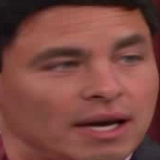

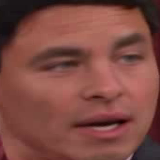

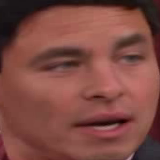

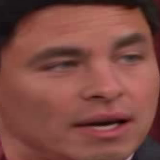

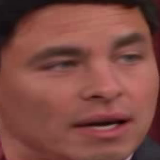

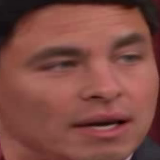

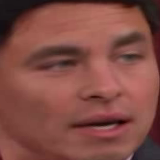

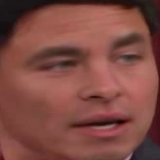

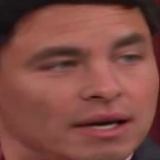

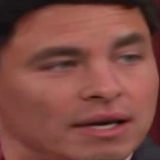

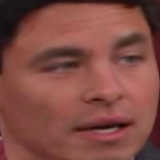

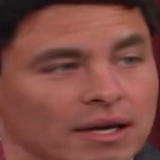

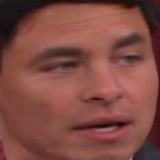

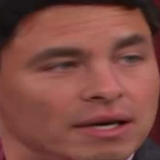

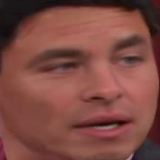

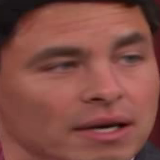

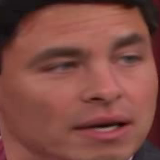

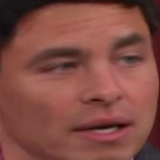

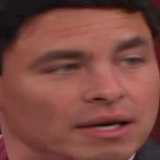

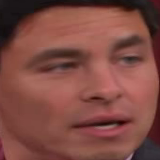

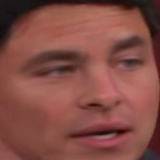

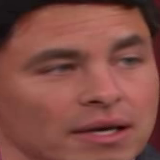

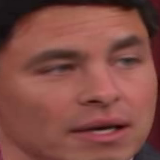

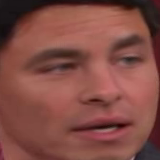

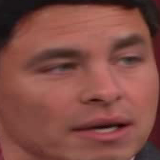

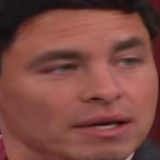

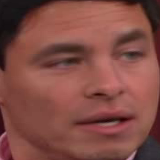

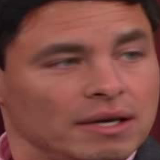

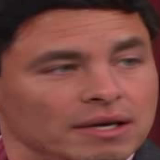

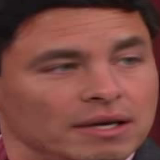

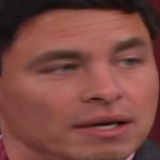

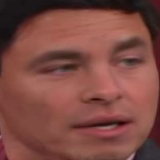

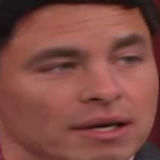

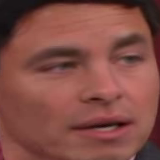

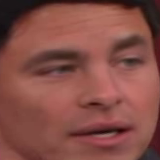

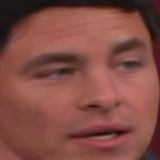

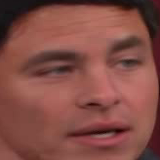

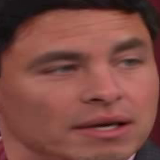

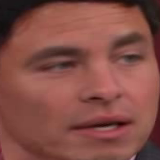

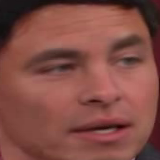

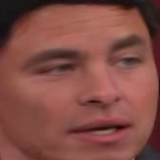

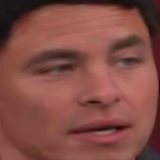

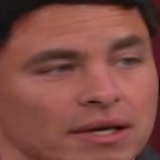

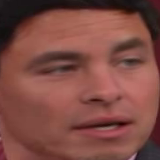

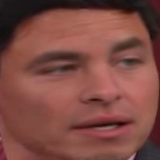

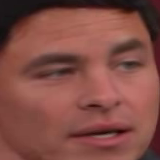

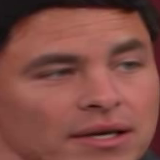

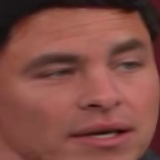

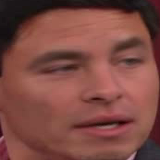

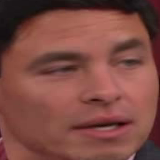

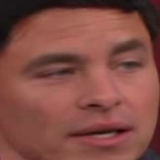

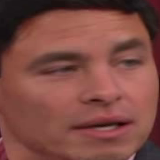

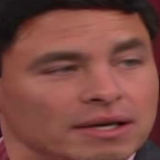

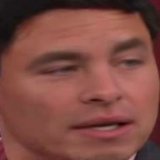

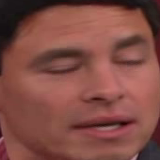

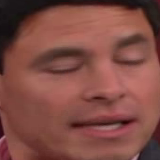

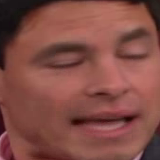

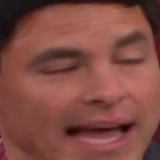

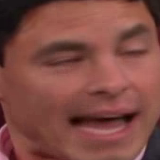

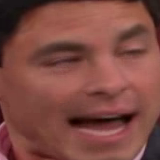

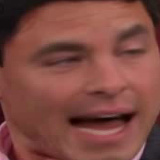

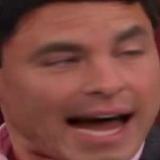

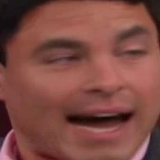

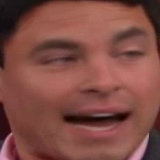

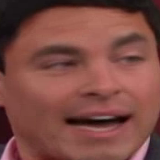

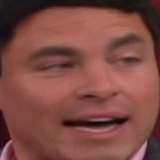

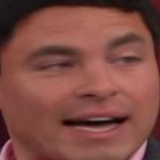

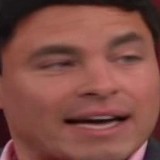

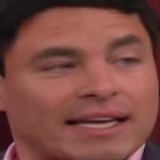

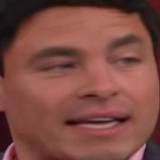

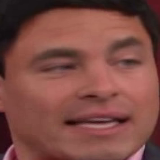

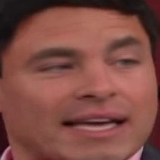

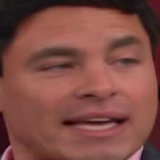

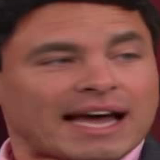

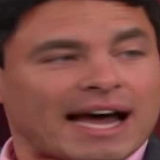

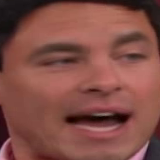

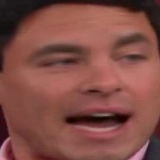

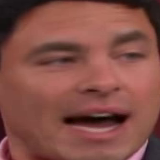

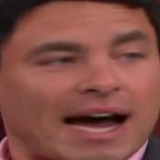

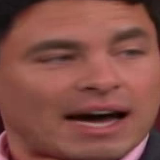

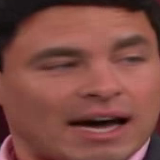

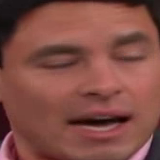

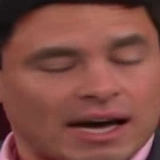

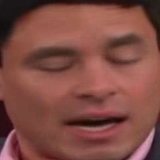

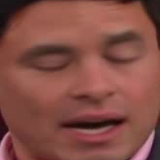

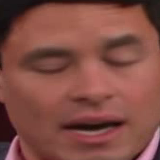

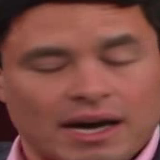

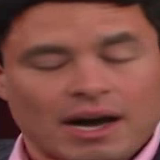

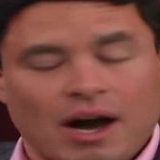

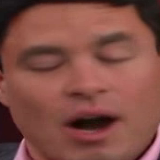

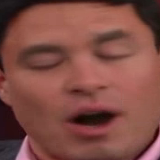

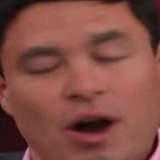

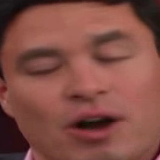

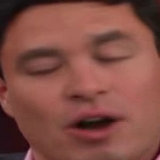

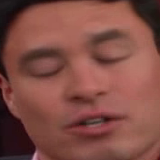

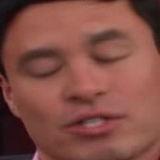

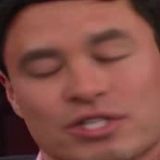

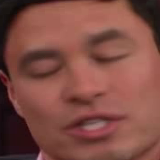

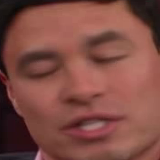

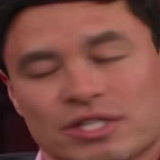

✅ Displayed 100 clean faces from /content/drive/MyDrive/Deep-fake-detection/id9_id16_0000.mp4
✅ Face extraction complete!


In [ ]:
import cv2
import numpy as np
from facenet_pytorch import MTCNN
from google.colab.patches import cv2_imshow  # ✅ To display images in Colab

# ✅ Define paths
VIDEO_FILE = "/content/drive/MyDrive/Deep-fake-detection/id9_id16_0000.mp4"  # Single video file

# ✅ Initialize MTCNN
mtcnn = MTCNN(keep_all=False, select_largest=True)

def extract_faces(video_path, frame_limit=100):
    """Extract up to 100 face-cropped frames from a single video using MTCNN and display them."""
    cap = cv2.VideoCapture(video_path)
    frame_count, displayed_faces = 0, 0

    while cap.isOpened() and frame_count < frame_limit:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert BGR to RGB for MTCNN
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # ✅ Detect face and get bounding box
        boxes, _ = mtcnn.detect(rgb_frame)

        if boxes is not None and len(boxes) > 0:
            x1, y1, x2, y2 = map(int, boxes[0])  # Get first face only

            # ✅ Ensure box is within image bounds
            h, w, _ = frame.shape
            x1, y1, x2, y2 = max(0, x1), max(0, y1), min(w, x2), min(h, y2)

            # ✅ Extract face from original BGR image
            face = frame[y1:y2, x1:x2]

            if face.size > 0:
                # ✅ Resize for clarity
                face_resized = cv2.resize(face, (160, 160), interpolation=cv2.INTER_LANCZOS4)

                # ✅ Display the extracted face
                cv2_imshow(face_resized)
                displayed_faces += 1

        frame_count += 1

    cap.release()
    print(f"✅ Displayed {displayed_faces} clean faces from {video_path}")

# ✅ Process Single Video
extract_faces(VIDEO_FILE)

print("✅ Face extraction complete!")
